In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from netCDF4 import Dataset

swwFile = 'runup.sww'
fid = Dataset(swwFile, mode='r')

x = fid.variables['x'][:]
y = fid.variables['y'][:]
elev = fid.variables['elevation'][:]
stage = fid.variables['stage'][:]

depth = stage - elev

fid.close()

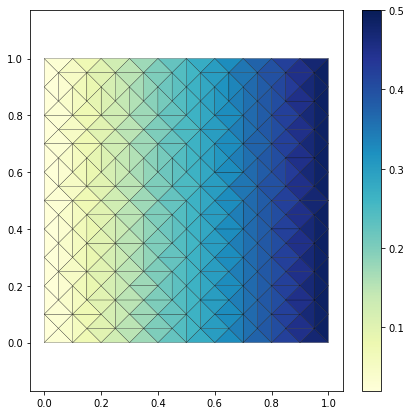

In [7]:
#------------------------------------------------------------------------------
# Create triangulation
#------------------------------------------------------------------------------
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

triang = mtri.Triangulation(x, y)

plt.figure(figsize=(7,7))
plt.tripcolor(triang, depth[-1],  shading='flat', edgecolors='k', cmap='YlGnBu', vmax = 0.5)
plt.colorbar()
plt.axis('equal');


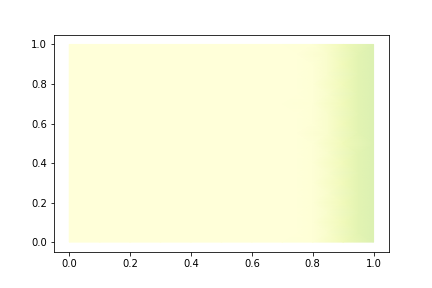
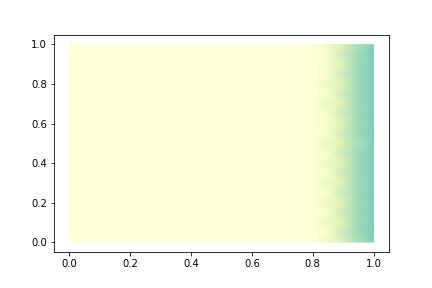
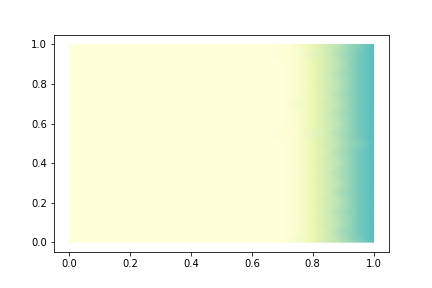
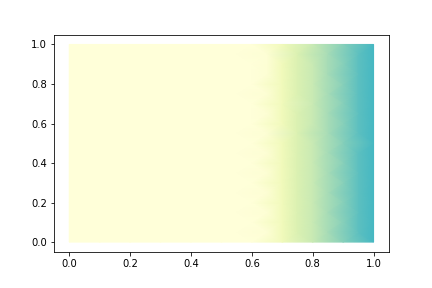
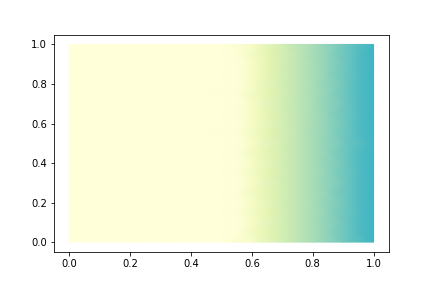
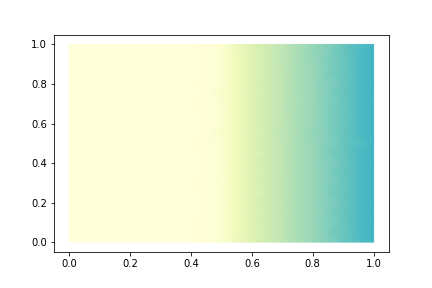
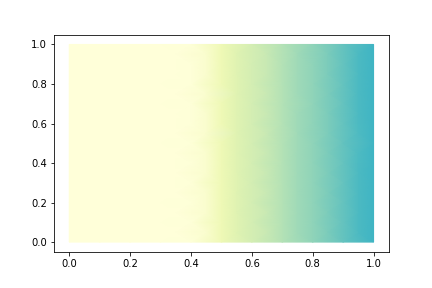
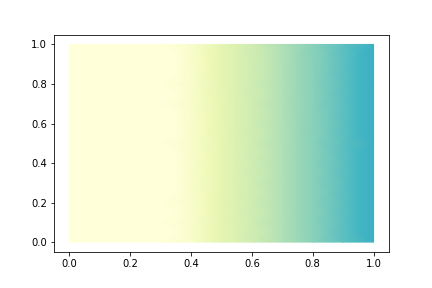
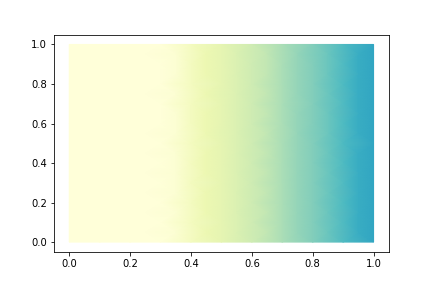
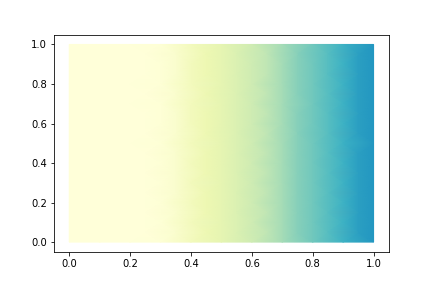
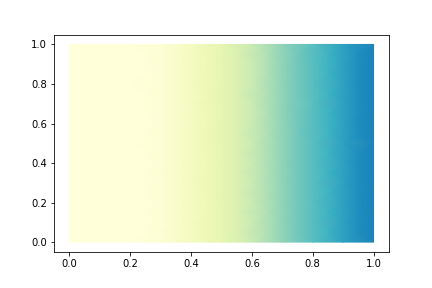
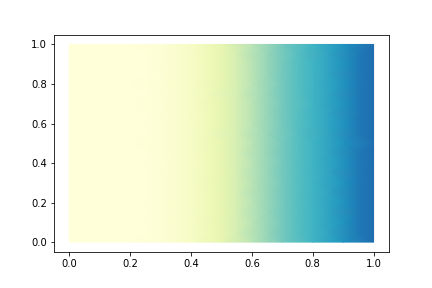
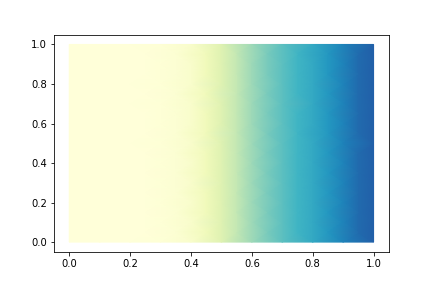
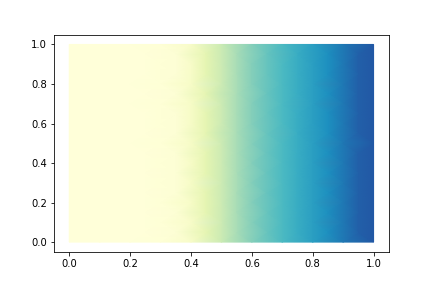
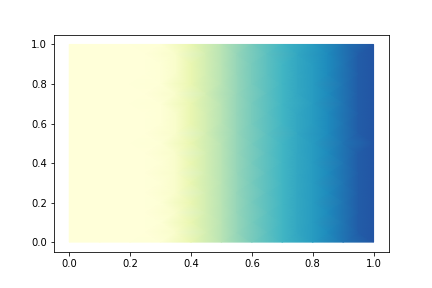
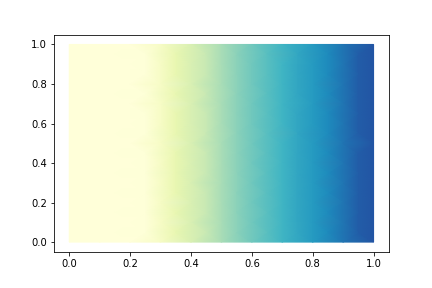
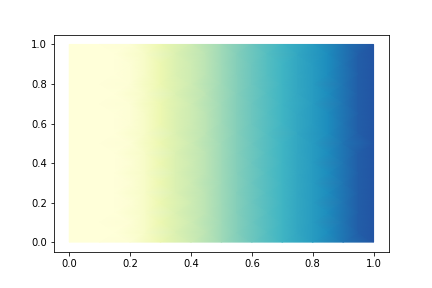
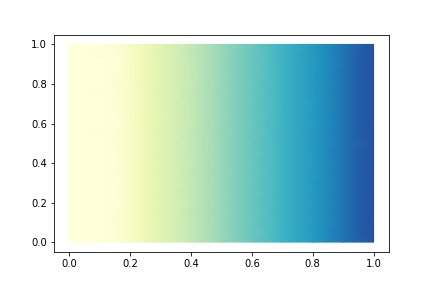
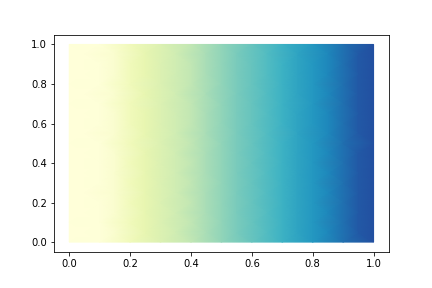
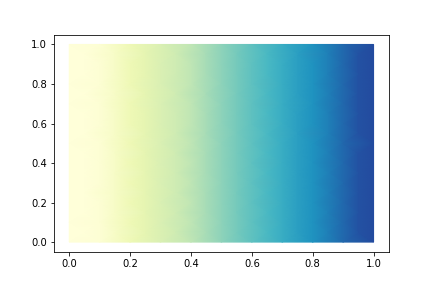
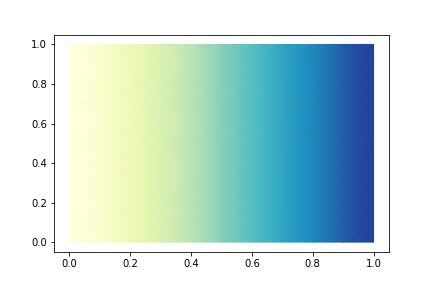
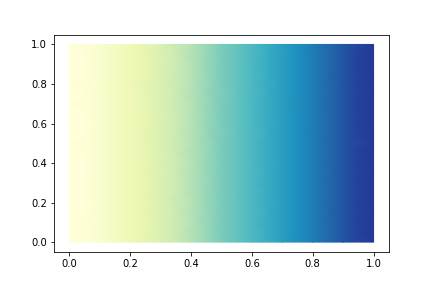
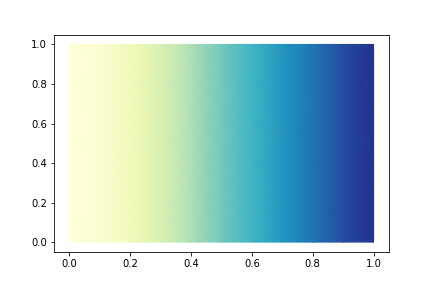
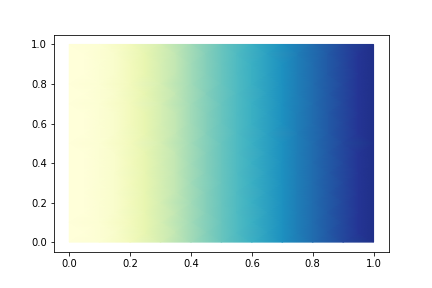
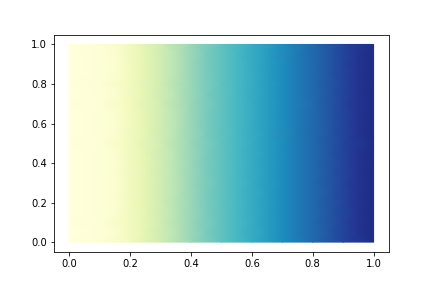
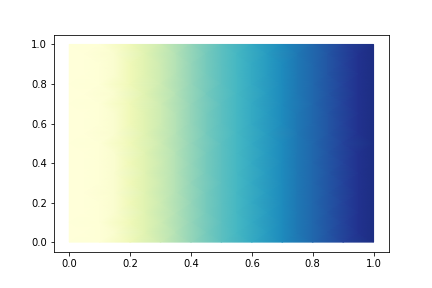
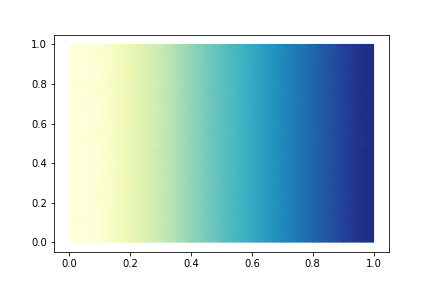
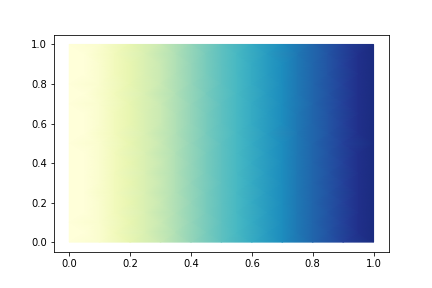
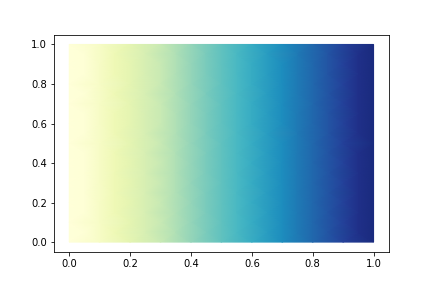
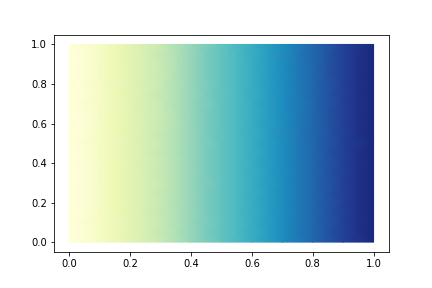
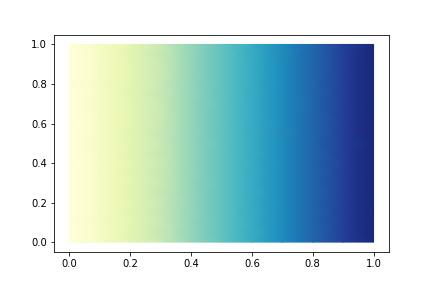
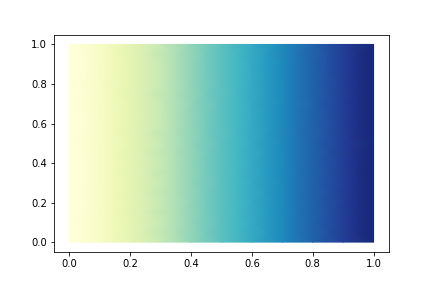
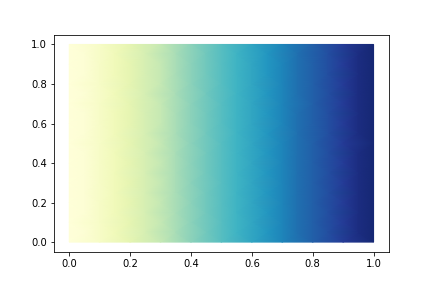
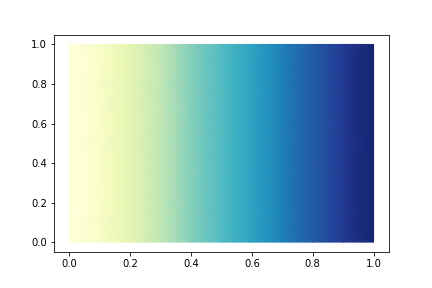
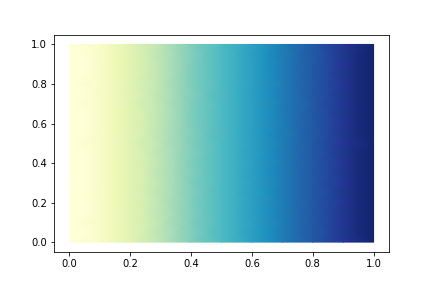
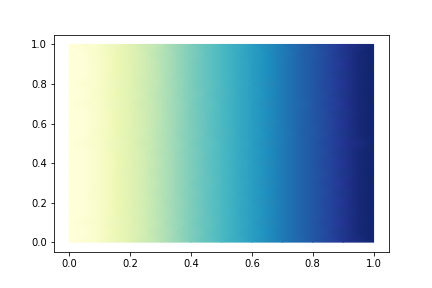
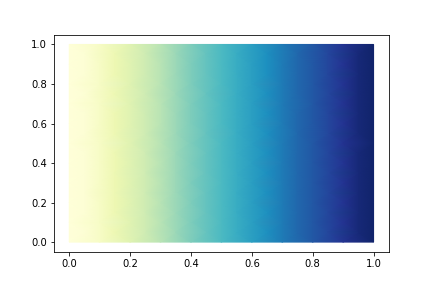
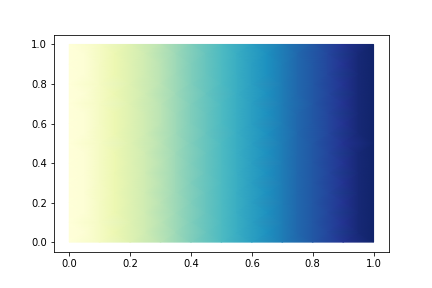
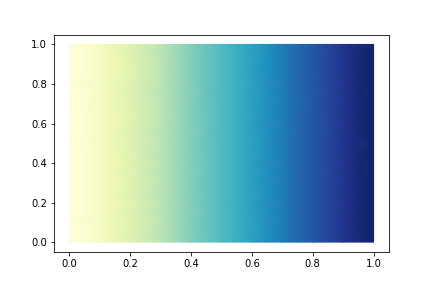
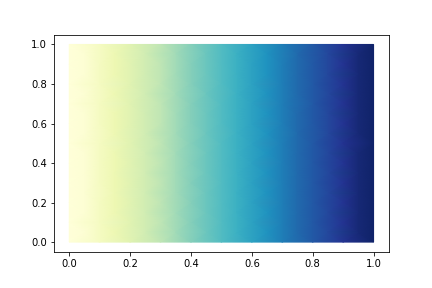
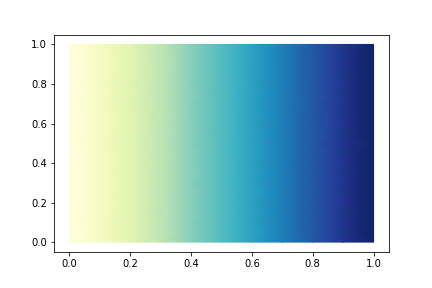
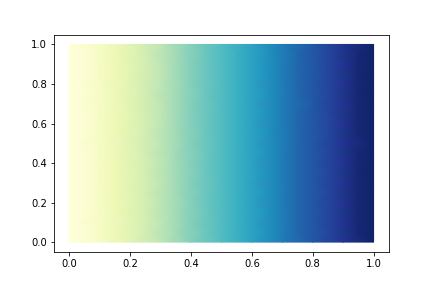
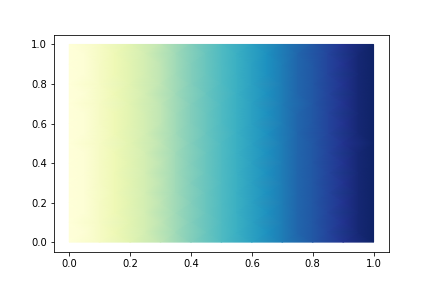
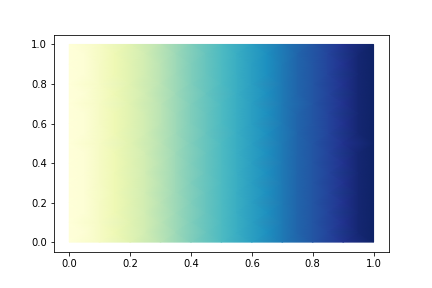
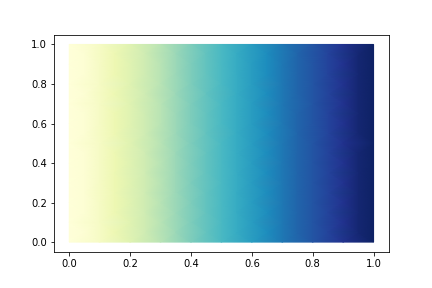
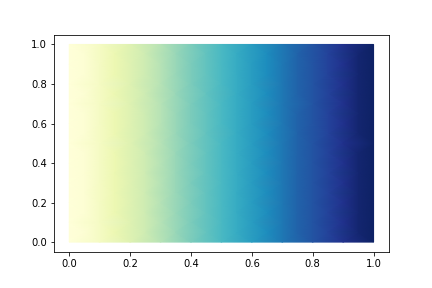
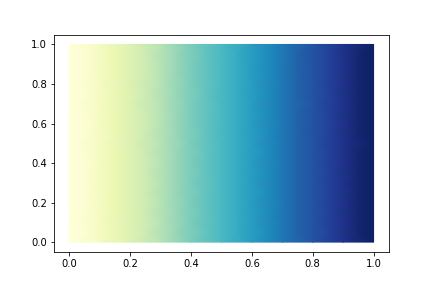
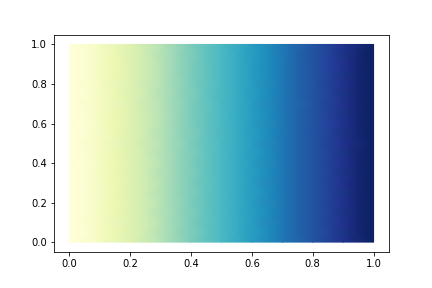
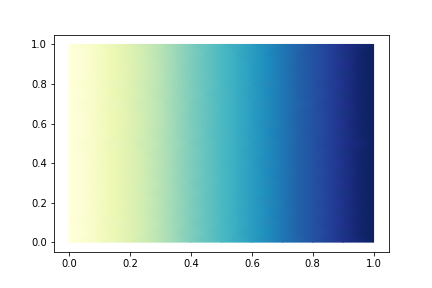
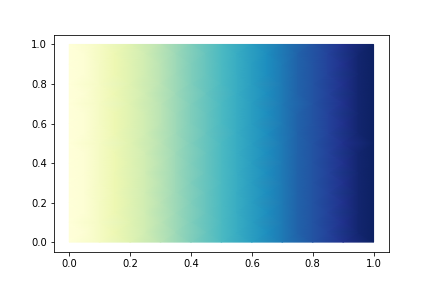
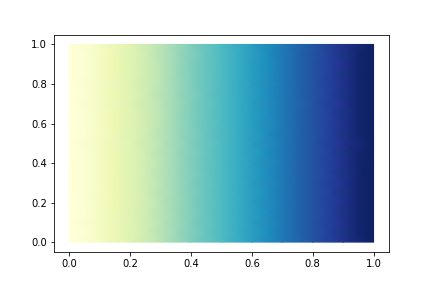
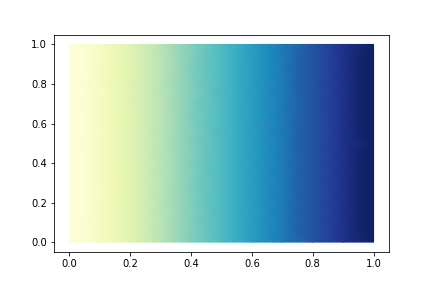
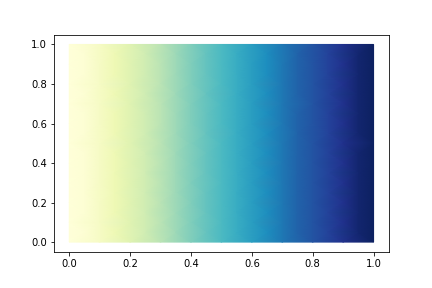
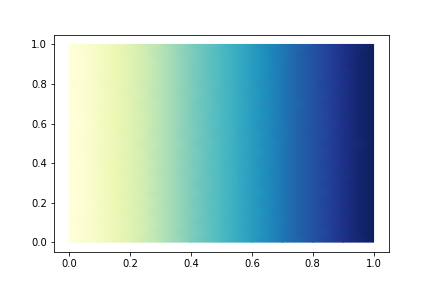
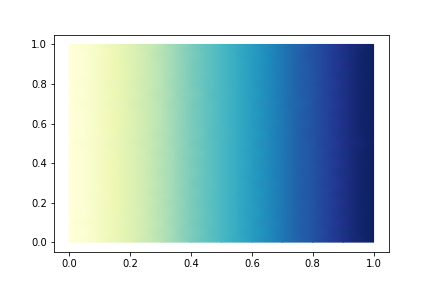
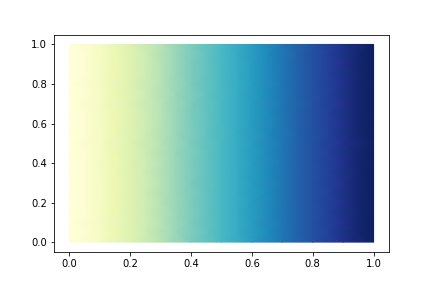
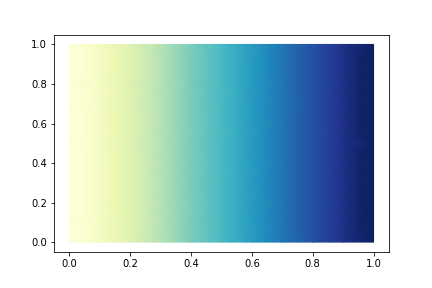
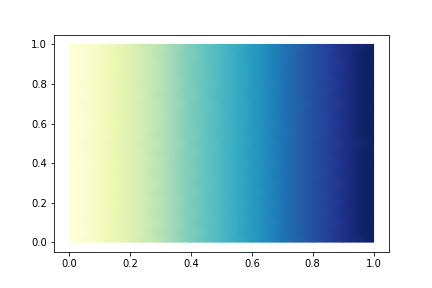
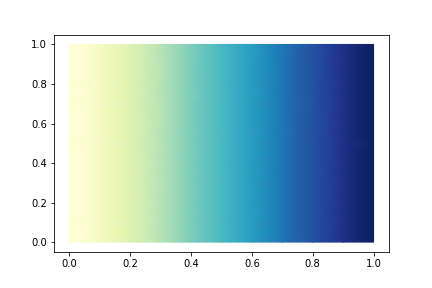
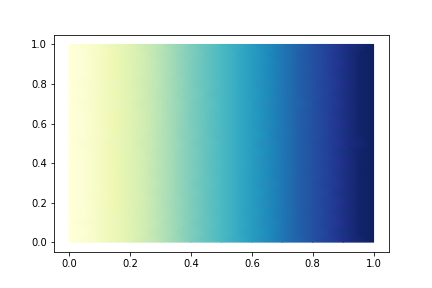
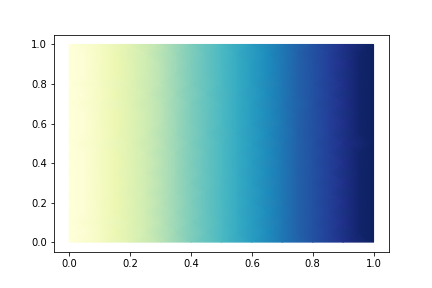
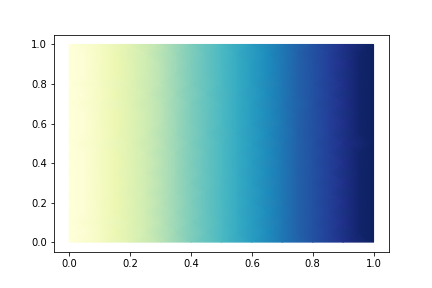
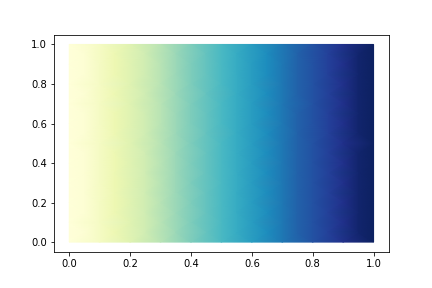
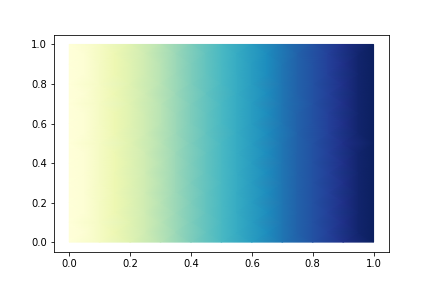
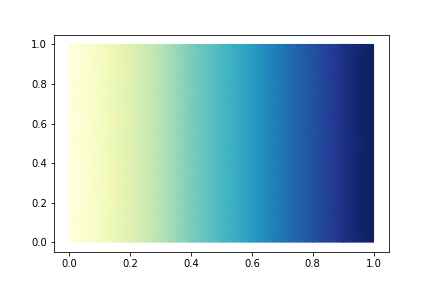
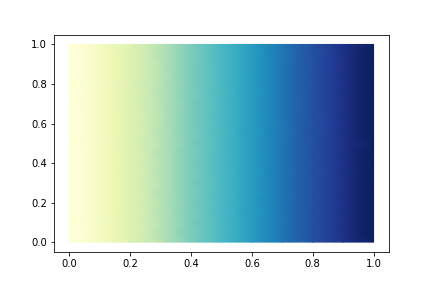
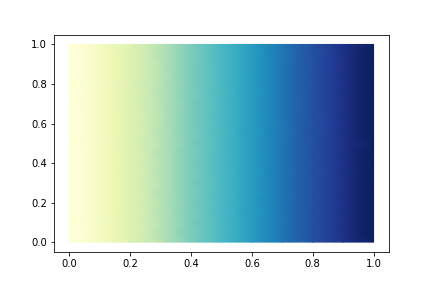
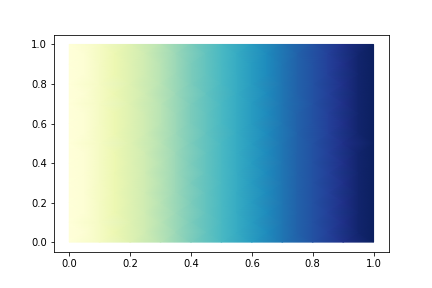
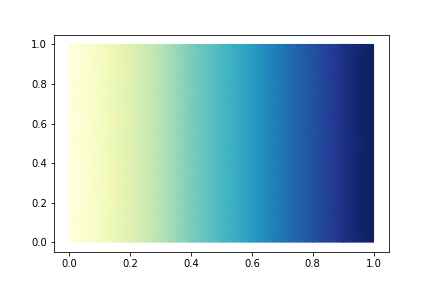
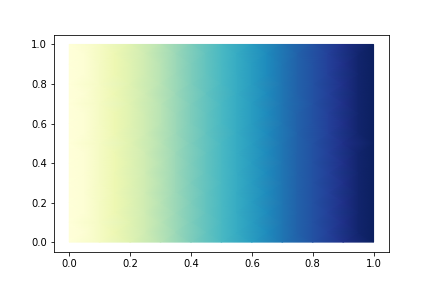
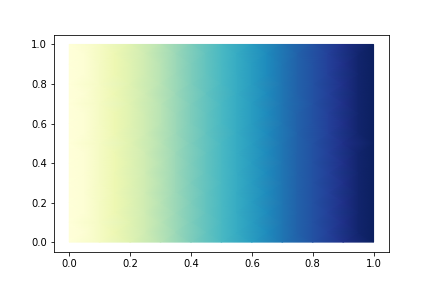
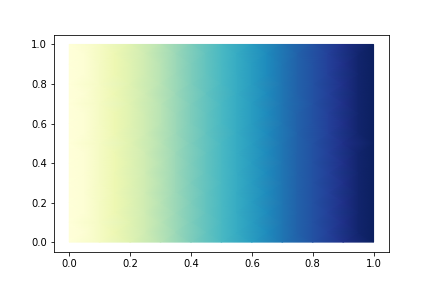
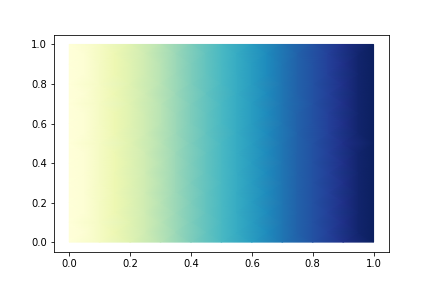
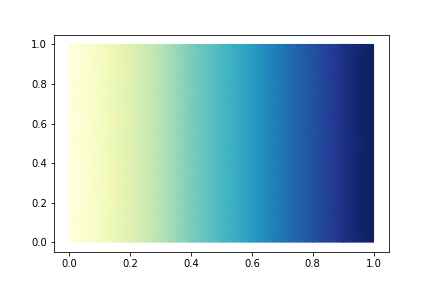
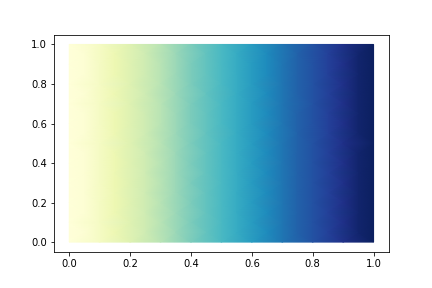
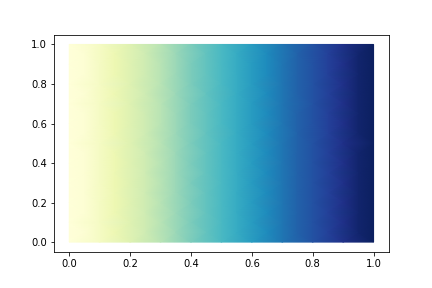
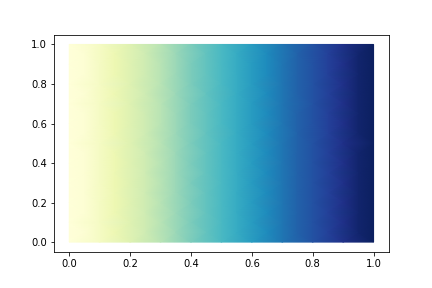
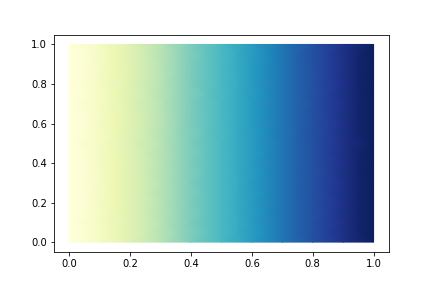
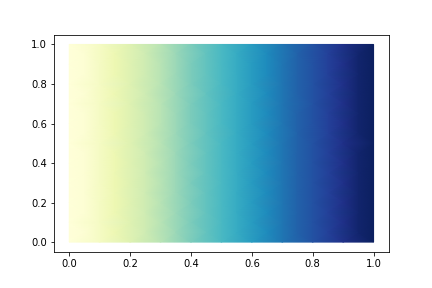
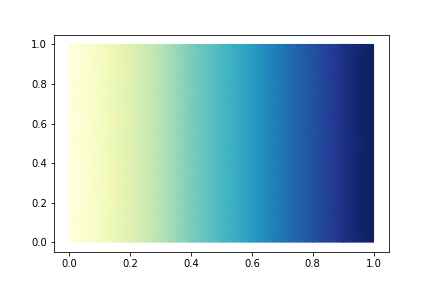
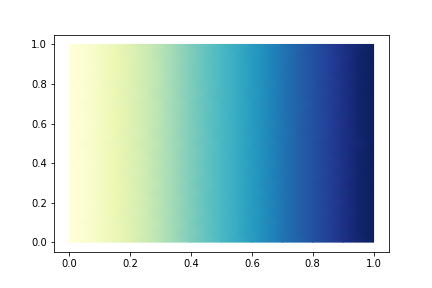
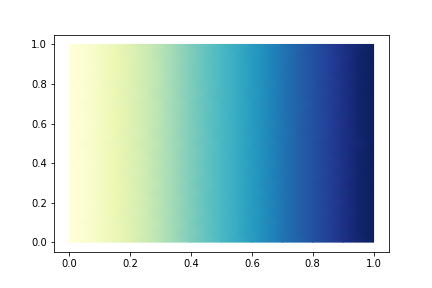
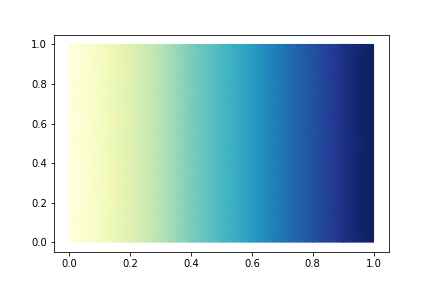
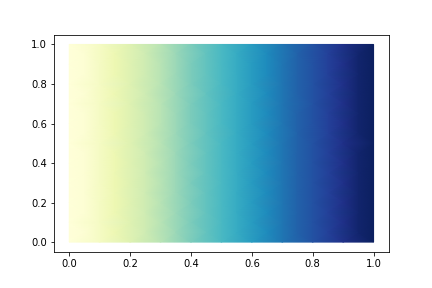
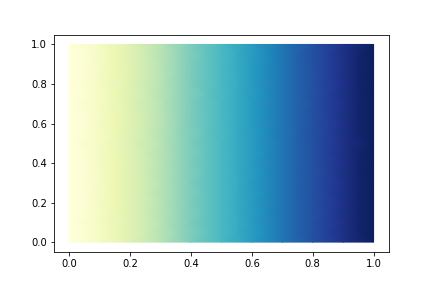
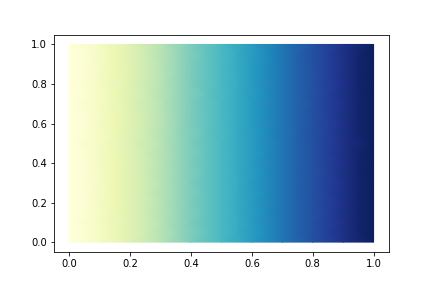
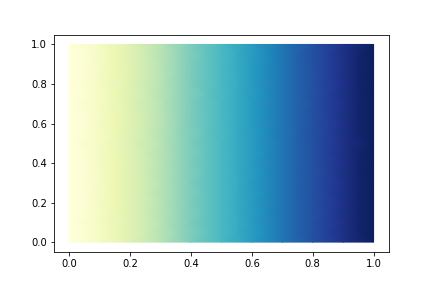
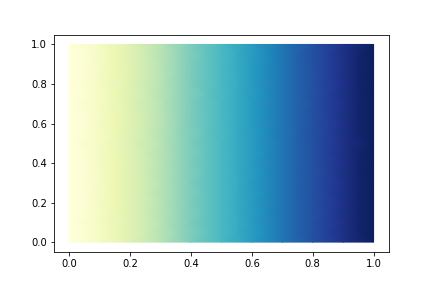
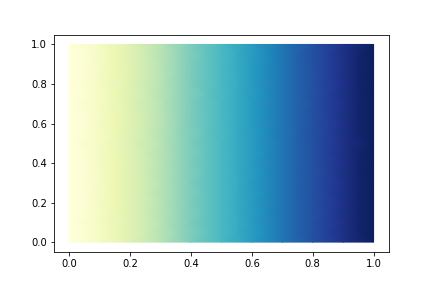
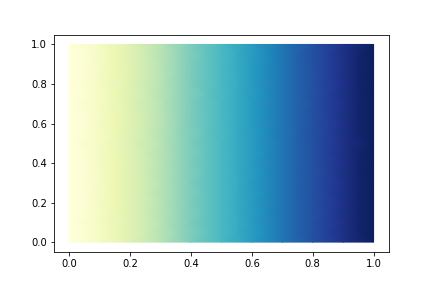
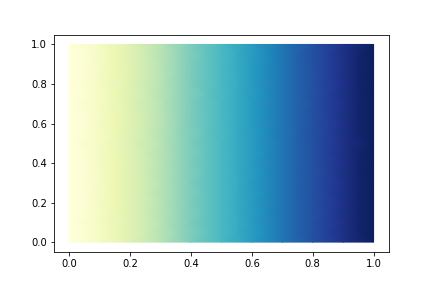
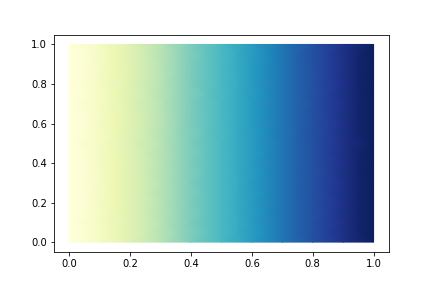
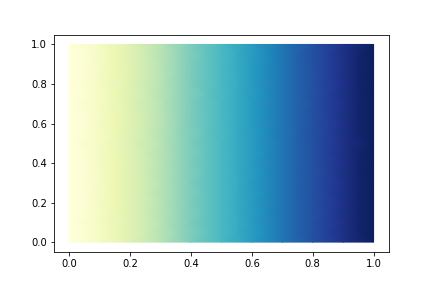
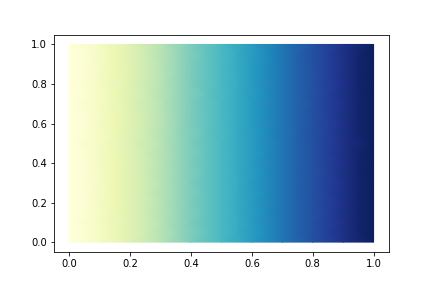
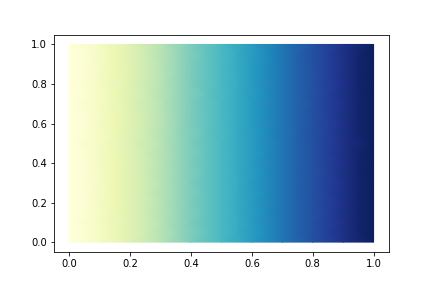
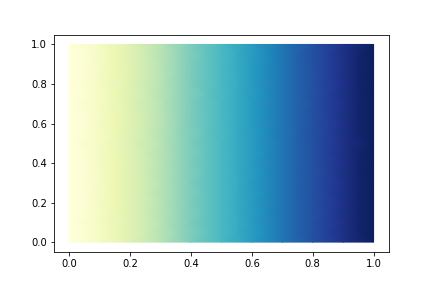
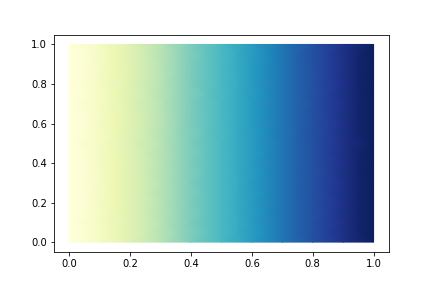
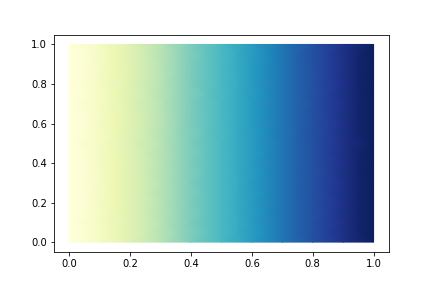
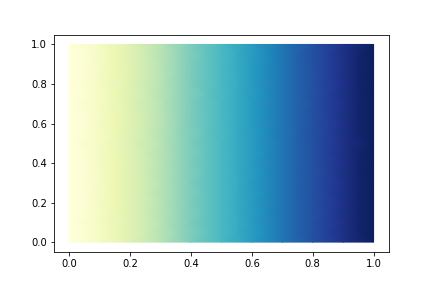
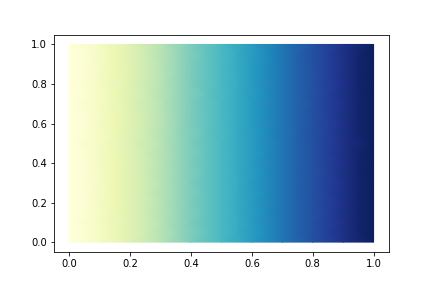
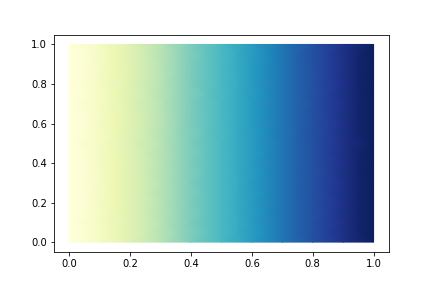

In [8]:
#------------------------------------------------------------------------------
# Animate
#------------------------------------------------------------------------------

from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
trip = ax.tripcolor(triang, depth[0], shading='gouraud', edgecolors='none', cmap='YlGnBu', vmax = 0.5)

def animate(i):
    
    ax.clear()
    trip = ax.tripcolor(triang, depth[i], shading='gouraud', edgecolors='none', cmap='YlGnBu', vmax = 0.5)

    return trip,

animation.FuncAnimation(fig, animate, frames=len(depth), interval=100)